
<img src="../images/starwarsstartrek.png" style="float: center; margin: 0px; height: 150px; width: 500px"> 

## SUBREDDIT CLASSIFIER

###### _Author: Afolabi Cardoso_

---

### EDA and Pre-processing

---
#### Contents:
[Overview](#Overview) | [Imports](#Imports) | [Data Cleaning Training Set](#Data-Cleaning-Training-Set) | [Data Cleaning Test Set](#Data-Cleaning-Test-Set) | [Exports](#Exports)


---
#### Overview



---
#### Imports

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [122]:
df = pd.read_csv('../data/clean.csv')
df = df[['title','selftext','created_utc','subreddit']]

In [123]:
df.head()

,title,selftext,created_utc,subreddit
0,Star wars game,,1646329318,starwars
1,If a Star Wars game about the famous wars in c...,,1646329234,starwars
2,What makes a Star Wars fan...a FAN?,,1646329180,starwars
3,What makes a Star Wars fan?,,1646328985,starwars
4,Random Clone Wars Thoughts,The series makes me appreciate Anakin so much ...,1646328915,starwars


## EDA

We will start by removing punctuations. I will use regex and pandas str.replace method

In [124]:
df['title'] = df['title'].str.replace('[^\w\s]',' ')

/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_21163/2705432854.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('[^\w\s]',' ')


#### Top occuring words

Let's start by looking at the top occuring words in the tittle and selftext column.
To do this, I will CountVectorize.

I will use a CountVectorizer with stop_words as english and ngram_range of 1,1

In [125]:
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))

In [126]:
cvec.fit(df['title'])

CountVectorizer(stop_words='english')

In [127]:
X = cvec.transform(df['title'])

In [128]:
X.shape

(2000, 3986)

In [129]:
cvec_df = pd.DataFrame(X.todense(), columns=cvec.get_feature_names_out())

In [130]:
cvec_df.head()

,000,001,002,01,04x02,061,10,100,1000,102,...,zero,ziegfeld,zimmer,zine,ziro,zoe,zoomable,zoomers,zora,имчисм
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Top 10 occuring words
What are the 10 most common words in the corpus 

In [131]:
top_ten_starwars = cvec_df[:999].sum().sort_values(ascending=False)[:15] #top ten in starwars subreddit
top_ten_startrek = cvec_df[1000:2000].sum().sort_values(ascending=False)[:15]  #top ten in startrek subreddit
top_ten_both = cvec_df[1000:2000].sum().sort_values(ascending=False)[:15]  #top ten in both

Bar graph showing top 10 words

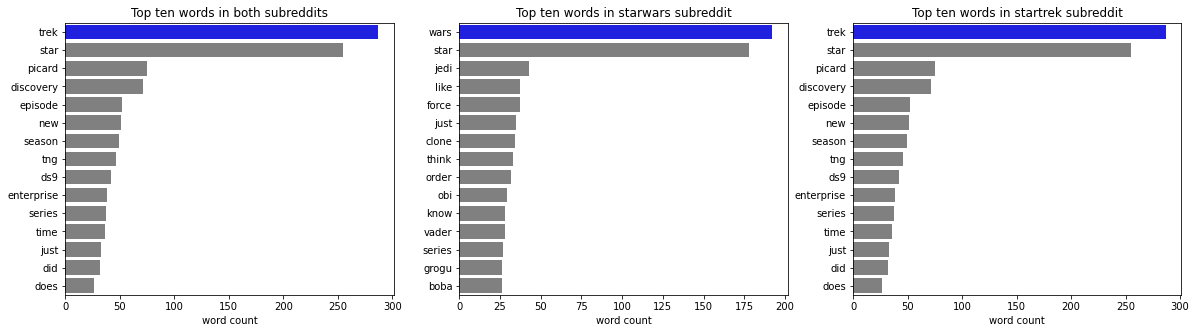

In [132]:
#create two axis 
fig ,ax = plt.subplots(1,3,figsize = (20,5))

#set color for largest bar
colr = ['grey' if (x<max(top_ten_both)) else 'blue' for x in top_ten_both]

#starwars bar chart
sns.barplot(ax = ax[0], x = top_ten_both, y = top_ten_both.index ,palette = colr)

#starwars bar chart
sns.barplot(ax = ax[1], x = top_ten_starwars, y = top_ten_starwars.index ,palette = colr)

#starwars bar chart
sns.barplot(ax = ax[2], x = top_ten_startrek, y = top_ten_startrek.index ,palette = colr)

#set labels
ax[0].set(xlabel = 'word count'), ax[1].set(xlabel = 'word count'), ax[2].set(xlabel = 'word count')
ax[0].set_title('Top ten words in both subreddits')
ax[1].set_title('Top ten words in starwars subreddit')
ax[2].set_title('Top ten words in startrek subreddit');

#### Remove common words

The chart above shows that the word star occures very frequently in both subreddits. I will remove it to prevent it from negatively affecting the model 

In [133]:
df['title']

0                                          Star wars game
1       If a Star Wars game about the famous wars in c...
2                     What makes a Star Wars fan   a FAN 
3                             What makes a Star Wars fan 
4                              Random Clone Wars Thoughts
                              ...                        
1995      I have finally watched DS9 from start to finish
1996                                           TOS script
1997    How did you get into Trek  What series was you...
1998    If you ve never seen this  this is the prototy...
1999    The Ready Room   All In   Sonequa Martin Green...
Name: title, Length: 2000, dtype: object

In [134]:
def  remove_words(str):
    words = ['star']
    result = []
    for word in str.split(' '):
        if word.lower() not in words:
            result.append(word)
    return ' '.join(result)

df['title'] = df['title'].map(remove_words)

In [135]:
df['title']

0                                               wars game
1          If a Wars game about the famous wars in comics
2                          What makes a Wars fan   a FAN 
3                                  What makes a Wars fan 
4                              Random Clone Wars Thoughts
                              ...                        
1995      I have finally watched DS9 from start to finish
1996                                           TOS script
1997    How did you get into Trek  What series was you...
1998    If you ve never seen this  this is the prototy...
1999    The Ready Room   All In   Sonequa Martin Green...
Name: title, Length: 2000, dtype: object

#### Most popular characters

I created a list of the top characters in both starwars and startrek. I will use that list to find the most talked about characters in the subreddits

In [136]:
characters = [ 'vader','anakin','skywalker', 'ahsoka', 'solo','leia','yoda','obi','kenobi',
              'palpatime','rey','chewbecca','r2d2','kylo','boba','maul','mace','dooku','padme',
              'grogu','jabba','finn','grievous','snoke','mandalorian','gerrera','rex','ventress','bb8','bane',
              'spock','kirk','picard','worf','nyota','mccoy','seven','scotty','sisko','data','hikaru','riker','dax',
              'troi','kathryn','miles','kira','forge','crusher','odo','tuvok','q',
              'guinan','burnham','saru','tilly','voq','ash','stamets','lorca','culber','pike','booker','adira','reno'
             ]


In [137]:
def character_check(string):
    lst = string.lower().split(" ")
    for char in lst:
        if char in characters:
            return char


In [138]:
df_starwars = df[df['subreddit'] == 'starwars']
df_startrek = df[df['subreddit'] == 'startrek']

In [139]:
# Top characters in both subreddits
top_char_sw = df_starwars['title'].map(character_check).value_counts()
top_char_st = df_startrek['title'].map(character_check).value_counts()

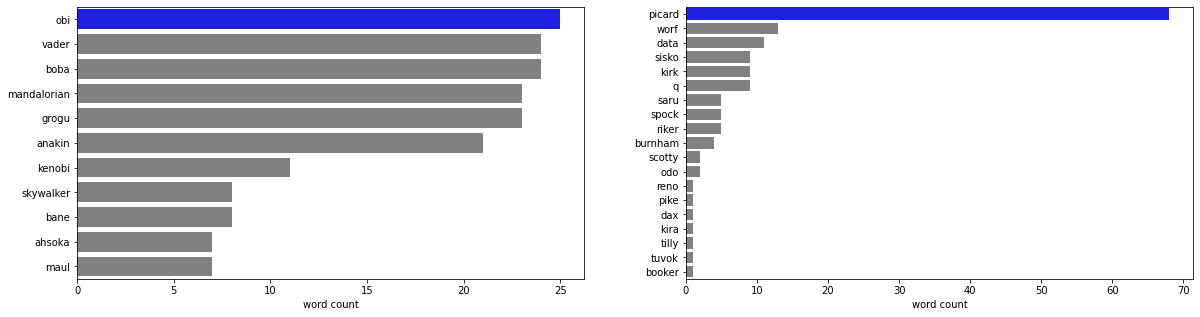

In [140]:

#create two axis 
fig ,ax = plt.subplots(1,2,figsize = (20,5))

#set color for largest bar
colr = ['grey' if (x<max(top_char_st)) else 'blue' for x in top_char_st]
colr = ['grey' if (x<max(top_char_sw)) else 'blue' for x in top_char_sw]


#starwars bar chart
sns.barplot(ax = ax[0], x = top_char_sw[:11], y = top_char_sw[:11].index ,palette = colr)

#starwars bar chart
sns.barplot(ax = ax[1], x = top_char_st, y = top_char_st.index ,palette = colr)

#set labels
ax[0].set(xlabel = 'word count')
ax[1].set(xlabel = 'word count')
ax[0].set_title('')
ax[1].set_title('');

## Sentiment analyser


Sentiment analysis is a method by which we try to determine the polarity of a statment. In this case, we will use sentiment analysis to compare the two subreddits. I am curious to see which group of fans have more positive opinions.

From the VADAR NLTK library, I will use the SentimentIntensityAnalyzer() method. This method takes in a string and returns a dictionary containing, a positive, neutral, negative and compound value. We will be using the compund score to perform our analysis.

In [141]:
#Instantiate the analyser
sia = SentimentIntensityAnalyzer()

In [142]:
#create a new column for the mood
df['mood'] = df['title'].map(lambda x: sia.polarity_scores(x)['compound'])

Let's plot the distribution of the mood for both 

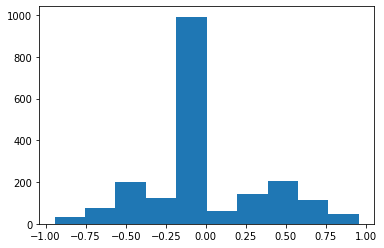

In [143]:

plt.hist(df['mood'], label='subreddit');

## Pre processing


I will binarize the target variable. I will set the value startrek to 0 and starwars to 1

In [144]:
df['subreddit'] = df['subreddit'].map({'startrek':0,
                                      'starwars':1} )

In [145]:
df['title'].isna().sum()

0

## Export

Export the cleaned dataframe as clean.csv

In [146]:
df.to_csv('../data/preprocessed.csv', index=False)